# Simulation Foundry, v2

Author: Henrique F. Carvalho (2021)

## Import module

In [628]:
#Import modules
import pyemma
import os
import glob
import pandas as pd
import numpy as np
import sys
import importlib
import matplotlib.pyplot as plt
#Path were classes are stored
base_path='/media/dataHog/hca/'
sys.path.append(base_path)
sys.path.append(base_path+'proLig/')

import main
import Trajectory
import Discretize
import plots
import tools

import warnings
warnings.filterwarnings('ignore')

importlib.reload(main)


<module 'main' from '/media/dataHog/hca/proLig/main.py'>

## Project and system definition

A system is defined using the *Project* class. Defining the project instance spawns all the simulation objects (instances of class systems) and defines the file structure, nomenclature that will later be used for system setup, simulation, and analysis.

System components (protein, substrate) are set, and one parameter of substrate, concentration, is defined.

Other parameters can be coded.

In [944]:
workdir=base_path+'proLig_CalB-Methanol'
results=workdir+"/project_results"

#Check for project folders and creates them if not found)
tools.Functions.fileHandler([workdir, results], confirmation=False)

protein=['calb']
ligand=['MeOH']
concentrations=['50mM', '150mM', '300mM', '600mM', '1M', '2.5M', '5.5M']
#concentrations=['50mM']

project=main.Project(title='CalB-Methanolysis', hierarchy=('protein', 'ligand', 'parameter'), workdir=workdir, 
                     parameter=concentrations, replicas=10, timestep=5,
                     protein=protein, ligand=ligand, results=results)


project_systems=project.setSystems()

for property, value in project.__dict__.items():
    print(f'{property}: {value}')

workdir: /media/dataHog/hca/proLig_CalB-Methanol
title: CalB-Methanolysis
hierarchy: ('protein', 'ligand', 'parameter')
parameter: ['50mM', '150mM', '300mM', '600mM', '1M', '2.5M', '5.5M']
replicas: 10
protein: ['calb']
ligand: ['MeOH']
timestep: 5
results: /media/dataHog/hca/proLig_CalB-Methanol/project_results
systems: {'calb-MeOH-50mM-1': <main.System object at 0x7f4073dc4990>, 'calb-MeOH-50mM-2': <main.System object at 0x7f4073dc4950>, 'calb-MeOH-50mM-3': <main.System object at 0x7f4073dc4f90>, 'calb-MeOH-50mM-4': <main.System object at 0x7f4073dc4fd0>, 'calb-MeOH-50mM-5': <main.System object at 0x7f4073dc4150>, 'calb-MeOH-50mM-6': <main.System object at 0x7f4073dc4cd0>, 'calb-MeOH-50mM-7': <main.System object at 0x7f4073dc4a50>, 'calb-MeOH-50mM-8': <main.System object at 0x7f4073dc4f10>, 'calb-MeOH-50mM-9': <main.System object at 0x7f4073dc4910>, 'calb-MeOH-50mM-10': <main.System object at 0x7f4073dc4350>, 'calb-MeOH-150mM-1': <main.System object at 0x7f4073dc4690>, 'calb-MeOH-150

## Featurization


To model the kinetics of methanol interactions with CalB, the trajectories are *featurized*. \
The class *Features* is used and the method (coded) for NAC calculation is employed.

The distance to *Near Attack Conformation* method monitors all pairwise protein-methanol distances ($d_{NAC}$) throughout simulated time. It is based on the *Near Attack Conformation* concept, applied to describe catalytic reactions.

In [945]:
importlib.reload(main)
features={}

features['nac_pre-calculated']=main.Features(project_systems, results=results).nac_precalc()

## Discretization

The *features* are discretized based on selected discretization scheme, **Binding free energy profile** or **Combinatorial**.


In [946]:
importlib.reload(main)
importlib.reload(Discretize)
discretize=main.Discretize.Discretize(project_systems, feature=features['nac'], results=results)

#### Binding free energy profile

Represent the feaurization as a binding free energy profile (**$\Delta$G**). Options to describe the profile are *sum*,  *mean*, *quantile*.

In [668]:
resolution=0.5
lims=(0,150)
sels=()'resname MeOH and name OA', 'resname SEA and index 1526')
stride=1
ps=5
start=0,
stop=10
nac_profile=discretize.nac_profile(shells,
                                   resolution=resolution,
                                   nac_lims=lims,
                                   labels=labels,
                                   stride=stride,
                                   ps=ps,
                                   start=start
                                   stop=stop)
#full=True
nac_profile

l1     calb                             ...                                
l2     MeOH                             ...                                
l3     50mM                             ... 5.5M                           
l4        1  1  1  1  1  1  1  1  1  1  ...   10 10 10 10 10 10 10 10 10 10
0.25      0  0  0  0  0  0  0  0  0  0  ...    0  0  0  0  0  0  0  0  0  0
0.75      0  0  0  0  0  0  0  0  0  0  ...    0  0  0  0  0  0  0  0  0  0
1.25      0  0  0  0  0  0  0  0  0  0  ...    0  0  0  0  0  0  0  0  0  0
1.75      0  0  0  0  0  0  0  0  0  0  ...    0  0  0  0  0  0  0  0  0  0
2.25      0  0  0  0  0  0  0  0  0  0  ...    0  0  0  0  0  0  0  0  0  0
...     ... .. .. .. .. .. .. .. .. ..  ...  ... .. .. .. .. .. .. .. .. ..
147.25    0  0  0  0  0  0  0  0  0  0  ...    0  0  0  0  0  0  0  0  0  0
147.75    0  0  0  0  0  0  0  0  0  0  ...    0  0  0  0  0  0  0  0  0  0
148.25    0  0  0  0  0  0  0  0  0  0  ...    0  0  0  0  0  0  0  0  0  0
148.75    0  0  0  0  0  0  0  0  0  0  ...    0  0  0  0  0  0  0  0  0  0
149.25    0  0  0  0  0  0  0  0  0  0  ...    0  0  0  0  0  0  0  0  0  0

[299 rows x 47500 columns]

Descriptor of: mean
Descriptor of: quantile


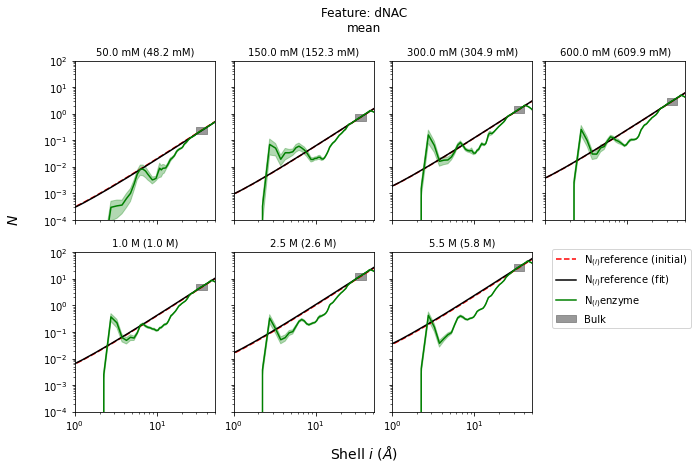

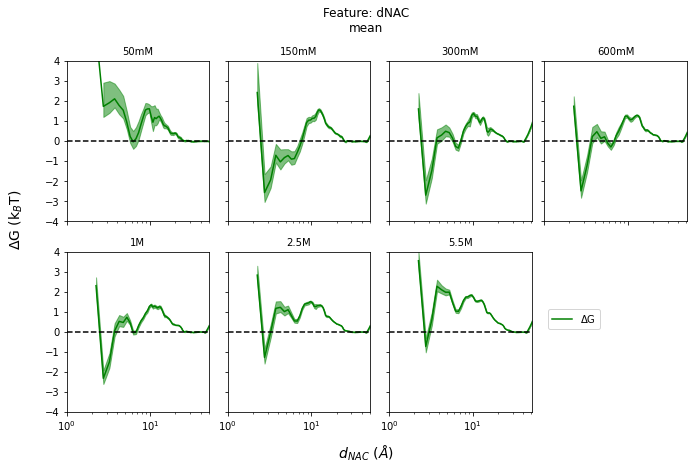

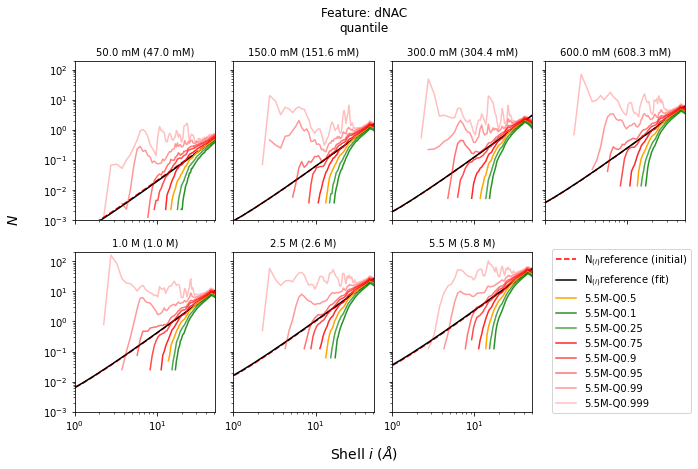

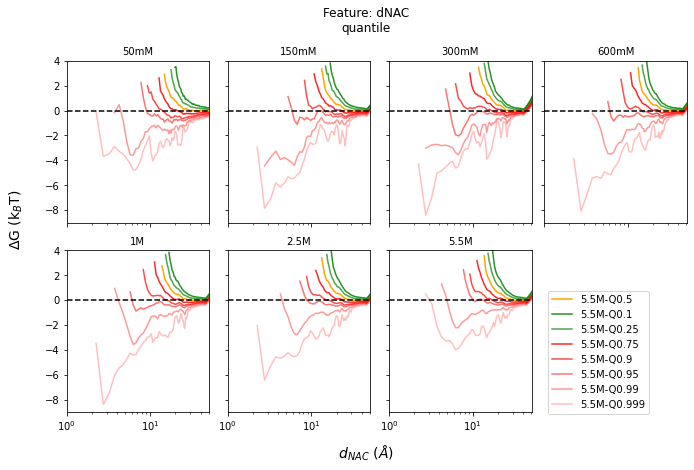

In [1176]:
importlib.reload(main)
importlib.reload(Discretize)
discretize=main.Discretize.Discretize(project_systems, feature=features['nac'], results=results)
descriptors=('mean','quantile')
dG={}

#For quantile control
quantiles=[0.1, 0.25, 0.5, 0.75, 0.90, 0.95, 0.99, 0.999]

for descriptor in descriptors:
    dG[descriptor]=discretize.dG_calculation(nac_profile, describe=descriptor,
                                             bulk=(30, 41),
                                             level=2,
                                             resolution=resolution,
                                             feature_name='dNAC', 
                                             mol='methanol',
                                             quantiles=quantiles,
                                             results=results)
    

#### Combinatorial

Discretize, for each frame, which combinations of regions are occupied by all ligands in the system (one state per frame)

The concept of regions is applied to the 1D $d_{NAC}$ reaction coordinate, whereby a region is defined as a *spherical shell* along the $d_{NAC}$ radius

Set the shell boundaries (limits, thickness). The minimum (0) and maximum (max) value are implicit.

E.g.: shells (4.5, 10, 12, 24) corresponds to: 
1. shell [0, 4.5[ (A)
2. shell [4.5, 10[ (P)
3. shell [10, 12[ (E)
4. shell [10, 24[ (S)
5. shell [24, max[ (B)


Labels *labels* of each region are optional but recommended (otherwise reverts to numerical). Number of *labels* is plus one the number of defined *regions*.

In [ ]:

importlib.reload(main)
shells=[4.5, 10, 12, 24]
labels=['A', 'P', 'E', 'S', 'B'] 

combinatorial=discretize.combinatorial(shells, labels=labels)

print(combinatorial)

discretize.plot(combinatorial)

## Trajectory operations

Initiate the trajectory object, which will be used to make further actions.

In [467]:
importlib.reload(main)
importlib.reload(Trajectory)
importlib.reload(tools)
trajectories=main.Trajectory.Trajectory(project_systems, results=results)

### Extract state frames

Define the frames belonging to a set of states across all *trajectories*. A dataframe of discretized trajectories must be given. 

In [ ]:

#stateLabels=['SB', 'ESB', 'PB', 'PSB', 'PEB', 'PESB', 'AB', 'ASB', 'AEB', 'AESB', 'APSB', 'APESB']
#states=[3, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 31]

#stateLabels=['SB', 'ESB', 'PB', 'PSB', 'PESB', 'AB', 'ASB', 'APSB', 'APESB']
#states=[3,7,9,11,15,17,19,27,31]

stateLabels=['PSB']
states=[11]

extracted_frames=trajectories.extractFrames_by_iterable(combinatorial, iterable=states, feature='nac')

## Density Maps

NOTE: Compute intensive, using previously stored files.

In [ ]:
#of extracted frames
densities, stats=trajectories.DensityMap_frames(frames=extracted_frames, level=2, dists=[('resid 290 and name NZ', 'resid 145 and name OD1')])

In [ ]:

stats_=stats
parameters=['min', 'max', 'mean', 'std']
level_unique=stats_.columns.get_level_values(level=0).unique()

print(stats_)

fig, ax=plt.subplots(4,2, figsize=(12,6), sharex=True)
axes=ax.flat

for p, ax in zip(level_unique, axes):
    #print(p, ax)
    df_level=stats_.loc[:, p]
    for it in df_level.columns.values:
        #print(df_level[it])
        ax.plot(df_level.index.values, df_level[it])
        ax.set_ylabel(p)
        #ax.set_yscale('log')
        ax.set_title(p)
        ax.axhline(y=30)

plt.show()

In [ ]:
full_densities=trajectories.DensityMap_fullTraj(level=2, filtered=True, stride=5)

In [ ]:
full_densities

In [ ]:
plots.plot_feature_histogram(systems_featurized_nac)

#for name, features in features_dict.items():
#    plots.plot_feature_histogram(concentrations, name, features, results)

for feature, parameter in features.items():
    print(feature)
    for value, data in parameter.items():
        print(value)
        print(data)


Plot histograms of discretized features.

In [ ]:

for scheme, v in disc.items():
    for feature, parameter_dict in v.items():
        for parameter, values in parameter_dict.items():
            data=np.load(values['discretized'][0]).flatten()
            minimum, maximum=np.around(np.min(data)), np.around(np.max(data))
            plt.hist(data, alpha=0.5, bins=np.arange(minimum, maximum), label=parameter)
                
        if scheme == 'combinatorial':
            label_names=base.Functions.sampledStateLabels(regions, labels=labels)
            positions=np.arange(0, len(label_names))
            plt.xticks(positions+0.5, label_names, rotation=70)      
        plt.legend()
        plt.xlabel('State Index')
        plt.ylabel('Counts')
        plt.title(f'{scheme}-{feature}')
        plt.savefig(f'{results}/discretization_{scheme}_histogram-{feature}.png', bbox_inches='tight', dpi=600)
        plt.show()

## Markov State Model

A dictionary of MSM *msm_dict* is created. Each MSM is identified by the corresponding discretization *scheme*, the *feature* and *parameter* as a key of *msm_dict*. The corresponding values themselves a dictionary holding the calculated properties of the MSM. The instance of *classes.MSM* is *instance*.

TODO: Fetch prot and mol directly from System class.

In [ ]:
msm_dict={}

protein, ligand, timestep=system.getProperties('protein', 'ligand', 'timestep')


for scheme, v in disc.items():
    for feature, parameter_dict in v.items():
        for parameter, values in parameter_dict.items():
            msm_dict[f'{scheme}-{feature}-{parameter}']={'instance': base.MSM(scheme, feature, parameter, 
                                                                              values, protein, ligand, timestep, results=results)}
            


**Implied Time Scales**

Calculate the Implied Time Scales for each MSM object using the *ITS* function. This function uses the pyEMMA function (pyemma.msm.its). The default array of lags can be used by pyEMMA, but here the values are provided by *lags*.

The function checks for previously calculated ITS plots by checking the presence of the corresponding *png* file in the *results* folder. 

The file path to the generated ITS image is stored in the *msm_dict* (2nd position)

In [ ]:
lags=[1, 2, 5, 10, 20, 40, 100, 500, 1000, 2000, 5000]

for name, model in msm_dict.items():
    model['its']=model['instance'].ITS(lags)
            

**Bayesian MSM**
Calculation of Bayesian MSM is made here. A lag time must be defined for each discretization *scheme-feature-parameter* combination.

In [ ]:
importlib.reload(base)
lag={}

minimum={}
minimum['nac']={'50mM':500, '150mM':1000, '300mM':1000, '600mM':2000, '1M':1000, '2.5M':2000, '5.5M':2000}
minimum['dist']={'50mM':1000, '150mM':1000, '300mM':2000, '600mM':2000, '1M':2000, '2.5M':2000, '5.5M':2000}
lag['minimum']=minimum

single={}
single['nac']={'50mM':None, '150mM':None, '300mM':None, '600mM':None, '1M':200, '2.5M':None, '5.5M':2000}
single['dist']={'50mM':None, '150mM':None, '300mM':None, '600mM':None, '1M':1000, '2.5M':None, '5.5M':None}
lag['single']=single

combinatorial={}
combinatorial['nac']={'50mM':200, '150mM':2000, '300mM':1000, '600mM':5000, '1M':2000, '2.5M':2000, '5.5M':2000}
combinatorial['dist']={'50mM':200, '150mM':200, '300mM':200, '600mM':500, '1M':500, '2.5M':1000, '5.5M':1000}
lag['combinatorial']=combinatorial

for name, model in msm_dict.items():
    print(name)
    model['bayesMSM']=model['instance'].bayesMSM(lag)

**Stationary Distribution**

Stationary distribution is calculated for each available model. Model instance accessed by *model(2)*

In [ ]:
pi=pd.DataFrame()

for name, model in msm_dict.items():
    print(name)
    pi_model=model['instance'].stationaryDistribution(model['bayesMSM'])
    pi=pd.concat([pi, pi_model], axis=1)

pi.to_csv(f'{results}/stationary_distributions.csv')

for scheme, v in disc.items():
    for feature in v.keys(): 
        if scheme == 'combinatorial':
            statdist_df=pi.xs((scheme, feature), axis=1).dropna(how='all')
            statdist_df.plot(kind='bar')
            label_names=base.Functions.sampledStateLabels(regions, sampled_states=statdist_df.index.values, labels=labels)
            positions=np.arange(0, len(label_names))
            plt.xticks(positions, label_names, rotation=70)
            plt.xlabel('Combinatorial States')
        else:
            pi.xs((scheme, feature), axis=1).plot(linestyle='-', marker='o') #kind='bar', stacked=True)
            plt.xlabel('State Index')
        plt.yscale('log')
        plt.ylabel('Stationary Distribution')
        plt.title(f'Discretization: {scheme}\nFeature: {feature}')
        plt.savefig(f'{results}/stationary_distribution-{scheme}-{feature}.png', bbox_inches='tight', dpi=600)
        plt.show()

**Flux**

Calculate the flux between set of source states *A_source* and set of sink states *B_sink*. 

In [ ]:
importlib.reload(base)
importlib.reload(plots)

flux_df=pd.DataFrame()
committor_df=pd.DataFrame()
pathway_df=pd.DataFrame()

for name,model in msm_dict.items():
    flux_model, committor_model, pathway_model=base.MSM.flux(name, model['bayesMSM'], parameter_scalar=parameter_scalar, 
                                regions=regions, labels=labels, 
                                A_source=['B', 'SB', 'ESB'],
                                B_sink=['AB', 'ASB', 'AEB', 'AESB', 'APB', 'APSB', 'APEB', 'APESB'],
                                top_pathways=3)
        
    flux_df=pd.concat([flux_df, flux_model], axis=0)
    committor_df=pd.concat([committor_df, committor_model], axis=0)
    pathway_df=pd.concat([pathway_df, pathway_model], axis=0)

    
plots.plot_pathways(pathway_df, ligand, results)
plots.plot_flux(flux_df, ligand, results)
plots.plot_committor(committor_df, ligand, results, regions, labels)


pathway_df.to_csv(f'{results}/pathways.csv')
flux_df.to_csv(f'{results}/net_fluxes.csv') 
committor_df.to_csv(f'{results}/committors.csv')





**Mean First Passage Times**

Calculate the MFPTs between all states.

k$_{on}$=1/MFPTxC, where C is concentration in Molar \
k$_{off}$=1/MFPT


Stores the resutls in the *mfpt* dataframe

**Warning**: This step takes a long time to perform. The following cell loads a pre-calculated *mfpt* dataframe.

In [ ]:
importlib.reload(base)
mfpt_df=pd.DataFrame()

for name, model in msm_dict.items():
    print(name)
    mfpt=model['instance'].MFPT(model['bayesMSM'])
    mfpt_df=pd.concat([mfpt_df, mfpt], axis=0)

mfpt_df.to_csv(f'{results}/mfpt.csv')



In [ ]:
importlib.reload(base)
importlib.reload(plots)

mfpt_df=pd.read_csv(f'{results}/mfpt.csv', index_col=[0,1,2], header=[0,1,2])

schemes=mfpt_df.index.unique(level='Scheme')
features=mfpt_df.index.unique(level='feature')
states=mfpt_df.index.unique(level='state_source')
parameters=mfpt_df.columns.get_level_values(level='parameter').unique()

error=0.2

for scheme in schemes:
    print('Scheme: ', scheme)
    for feature in features:
        print('Feature: ', feature)
        plots.plot_MFPT(mfpt_df, scheme, feature, concentrations, error=error, labels=labels, regions=regions)
        plt.savefig(f'{results}/mfpt_{scheme}-{feature}-{error}.png', bbox_inches='tight', dpi=600)
        plt.show()


**Process Trajectories**
